<a href="https://colab.research.google.com/github/arthurfg/BackuPy/blob/main/Regress%C3%A3o_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
titanic = sns.load_dataset('titanic')

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

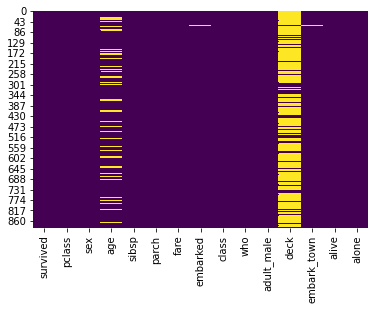

In [ ]:
sns.heatmap(titanic.isnull(),cbar= False, cmap= 'viridis')

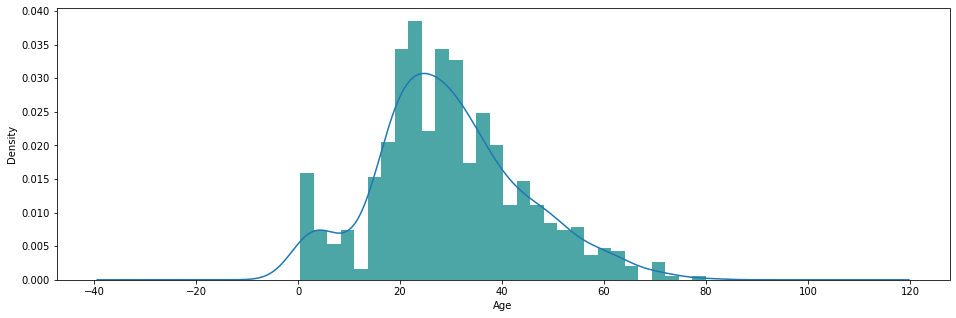

In [ ]:
ax = titanic['age'].hist(bins = 30, density=True, color = 'teal', alpha = 0.7, figsize = (16,5))
titanic['age'].plot(kind='density')
ax.set_xlabel('Age')
plt.show()

Text(0.5, 1.0, 'Men')

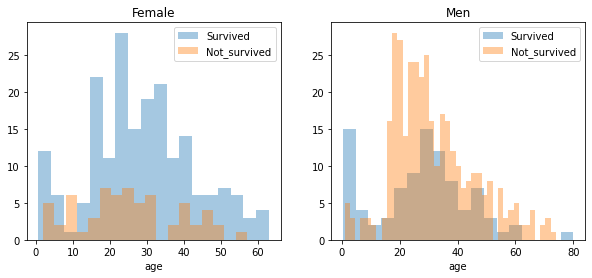

In [ ]:
survived = 'survived'
not_survived = 'not survived'

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']== 'male']

ax = sns.distplot(women[women[survived]==1].age.dropna(), bins=18, label='Survived',ax=axes[0],kde= False)
ax = sns.distplot(women[women[survived]==0].age.dropna(), bins=18, label='Not_survived',ax=axes[0],kde= False)
ax.legend()
ax.set_title('Female')

ax = sns.distplot(men[men[survived]==1].age.dropna(), bins=18, label='Survived',ax=axes[1],kde= False)
ax = sns.distplot(men[men[survived]==0].age.dropna(), bins=40, label='Not_survived',ax=axes[1],kde= False)
ax.legend()
ax.set_title('Men')

In [ ]:
 titanic.sex.value_counts()

male      577
female    314
Name: sex, dtype: int64

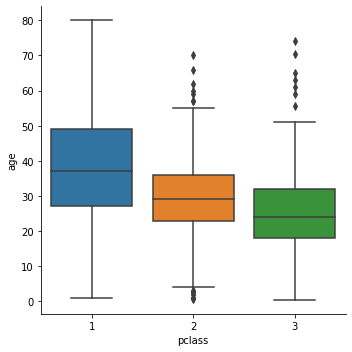

In [ ]:
sns.catplot(x= 'pclass', y='age', data = titanic, kind= 'box')

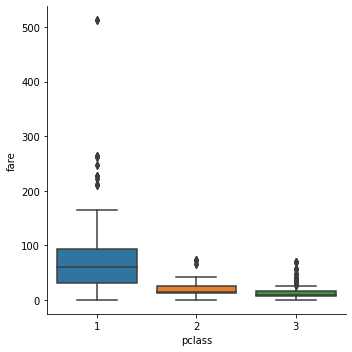

In [ ]:
sns.catplot(x='pclass', y='fare', data= titanic, kind='box')

In [ ]:
def impute_age(cols):
  age = cols[0]
  pclass = cols[1]

  if pd.isnull(age):
    if pclass == 1:
      return titanic[titanic['pclass']==1]['age'].mean()
    elif pclass ==2:
      return titanic[titanic['pclass']==2]['age'].mean()
    elif pclass ==3:
      return titanic[titanic['pclass']==3]['age'].mean()

  else:
    return age

In [ ]:
titanic.age = titanic[['age','pclass']].apply(impute_age, axis = 1)

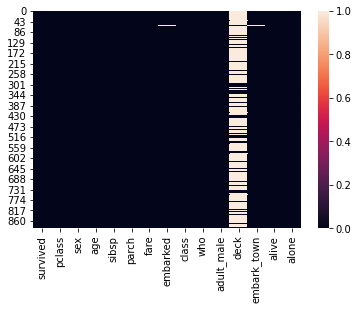

In [ ]:
sns.heatmap(titanic.isnull())

In [ ]:
titanic.age.value_counts()

25.140620    136
38.233441     30
24.000000     30
22.000000     27
18.000000     26
            ... 
53.000000      1
66.000000      1
70.500000      1
20.500000      1
0.420000       1
Name: age, Length: 91, dtype: int64

In [ ]:
titanic.age.describe()

count    891.000000
mean      29.292875
std       13.210527
min        0.420000
25%       22.000000
50%       26.000000
75%       37.000000
max       80.000000
Name: age, dtype: float64

In [ ]:
common_value = 's'
titanic.embarked.fillna(common_value, inplace=True)

In [ ]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
titanic.drop(labels=['deck','embark_town','alive'], inplace=True, axis=1)

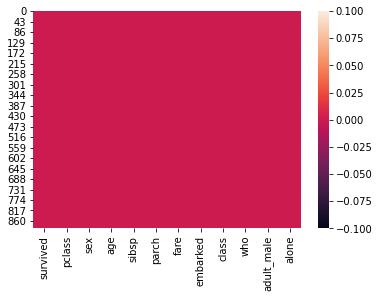

In [ ]:
sns.heatmap(titanic.isnull())

In [ ]:
titanic.fare = titanic.fare.astype('int')
titanic.age = titanic.age.astype('int')
titanic.pclass = titanic.pclass.astype('int')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   survived    891 non-null    int64   
 1   pclass      891 non-null    int64   
 2   sex         891 non-null    object  
 3   age         891 non-null    int64   
 4   sibsp       891 non-null    int64   
 5   parch       891 non-null    int64   
 6   fare        891 non-null    int64   
 7   embarked    891 non-null    object  
 8   class       891 non-null    category
 9   who         891 non-null    object  
 10  adult_male  891 non-null    bool    
 11  alone       891 non-null    bool    
dtypes: bool(2), category(1), int64(6), object(3)
memory usage: 65.5+ KB


## Convert categorical data into numerical data

In [ ]:
 genders = {'male' : 0, 'female' : 1}
 titanic.sex = titanic.sex.map(genders)

In [ ]:
genders

{'female': 1, 'male': 0}

In [ ]:
titanic.sex

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [ ]:
titanic.sex[:]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,S,Third,man,True,False
1,1,1,1,38,1,0,71,C,First,woman,False,False
2,1,3,1,26,0,0,7,S,Third,woman,False,True
3,1,1,1,35,1,0,53,S,First,woman,False,False
4,0,3,0,35,0,0,8,S,Third,man,True,True


In [ ]:
who = {'man':0,'woman':1, 'child':2}
titanic.who = titanic.who.map(who)

In [ ]:
adult_male = {True:1, False:0}
titanic.adult_male = titanic.adult_male.map(adult_male)

In [ ]:
alone = {True:1,False:0}
titanic.alone = titanic.alone.map(alone)
ports = {'S':0, 'C':1, 'Q':2}
titanic.embarked = titanic.embarked.map(ports)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,0,22,1,0,7,0.0,Third,0,1,0
1,1,1,1,38,1,0,71,1.0,First,1,0,0
2,1,3,1,26,0,0,7,0.0,Third,1,0,1
3,1,1,1,35,1,0,53,0.0,First,1,0,0
4,0,3,0,35,0,0,8,0.0,Third,0,1,1


In [ ]:
titanic.drop(labels=['class'], axis = 1, inplace = True)

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,7,0.0,0,1,0
1,1,1,1,38,1,0,71,1.0,1,0,0
2,1,3,1,26,0,0,7,0.0,1,0,1
3,1,1,1,35,1,0,53,0.0,1,0,0
4,0,3,0,35,0,0,8,0.0,0,1,1


Modelo de regressão logística

In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [ ]:
fuck = -999999
X = titanic.drop('survived', axis =1)
y = titanic.survived
X.embarked.fillna(fuck, inplace = True)
X.embarked = X.embarked.astype('int')

X_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state = 42)

In [ ]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 295 entries, 709 to 173
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   pclass      295 non-null    int64
 1   sex         295 non-null    int64
 2   age         295 non-null    int64
 3   sibsp       295 non-null    int64
 4   parch       295 non-null    int64
 5   fare        295 non-null    int64
 6   embarked    295 non-null    int64
 7   who         295 non-null    int64
 8   adult_male  295 non-null    int64
 9   alone       295 non-null    int64
dtypes: int64(10)
memory usage: 25.4 KB


In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter= 200)
model.fit(X_train, y_train)
y_predict = model.predict(x_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model.score(x_test,y_test)

0.8271186440677966

## Feature selection


In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter=200)
rfe = RFE(model,5,verbose=1)
rfe = rfe.fit(X,y)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
rfe.support_

array([ True,  True, False,  True, False, False, False,  True,  True,
       False])

In [ ]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,0,3,0,22,1,0,7,0.0,0,1,0
1,1,1,1,38,1,0,71,1.0,1,0,0
2,1,3,1,26,0,0,7,0.0,1,0,1
3,1,1,1,35,1,0,53,0.0,1,0,0
4,0,3,0,35,0,0,8,0.0,0,1,1


In [ ]:
 XX = X[X.columns[rfe.support_]]
 XX.head()

,pclass,sex,sibsp,who,adult_male
0,3,0,1,0,1
1,1,1,1,1,0
2,3,1,0,1,0
3,1,1,1,1,0
4,3,0,0,0,1


In [ ]:
X_train, x_test, y_train, y_test = train_test_split(XX,y, test_size = 0.2, random_state = 8, stratify = y)

In [ ]:
X_train.shape

(712, 5)

In [ ]:
model = LogisticRegression(solver='lbfgs', max_iter= 500)
model.fit(X_train, y_train)
y_predict = model.predict(x_test)

In [ ]:
model.score(x_test,y_test)

0.8491620111731844

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [ ]:
y_predict_prob = model.predict_proba(x_test)[:,1]

In [ ]:
[fpr,tpr,thr] = roc_curve(y_test, y_predict_prob)

In [ ]:
print('Accuracy: ', accuracy_score(y_test,y_predict))
print('Log_loss: ', log_loss(y_test,y_predict_prob))
print('auc: ', auc(fpr,tpr))

Accuracy:  0.8491620111731844
Log_loss:  0.3651903011060724
auc:  0.901844532279315


In [ ]:
fpr

In [ ]:
idx = np.min(np.where(tpr>0.95))
idx

20

In [ ]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,alone
0,3,0,22,1,0,7,0,0,1,0
1,1,1,38,1,0,71,1,1,0,0
2,3,1,26,0,0,7,0,1,0,1
3,1,1,35,1,0,53,0,1,0,0
4,3,0,35,0,0,8,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27,0,0,13,0,0,1,1
887,1,1,19,0,0,30,0,1,0,1
888,3,1,25,1,2,23,0,1,0,0
889,1,0,26,0,0,30,1,0,1,1


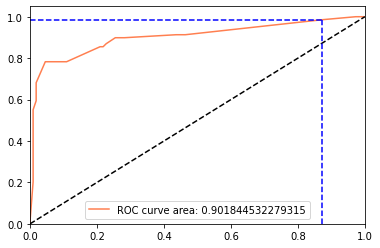

In [ ]:
plt.figure()
plt.plot(fpr,tpr, color = 'coral', label = 'ROC curve area: ' + str(auc(fpr,tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')
plt.plot([fpr[idx], fpr[idx]], [0,tpr[idx]], 'k--', color = 'blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend()
plt.show()
